In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## **Градиентный спуск для функции с одной переменной**

In [2]:
def f(x):
    return 3*x**2

def df(x):
    return 6*x

In [3]:
#начальные параметры
x0 = 5 #начальная точка
lambda_ = 0.1 #скорость обучения
tolerance = 1e-8 #условие остановки
x_values = [x0] #хранение значений х
f_values = [f(x0)] #хранение значений функций

In [4]:
while True:
    x1 = x0 - lambda_ * df(x0)
    x_values.append(x1)
    f_values.append(f(x1))
    
    if abs(x1-x0) < tolerance:
        break
    x0 = x1

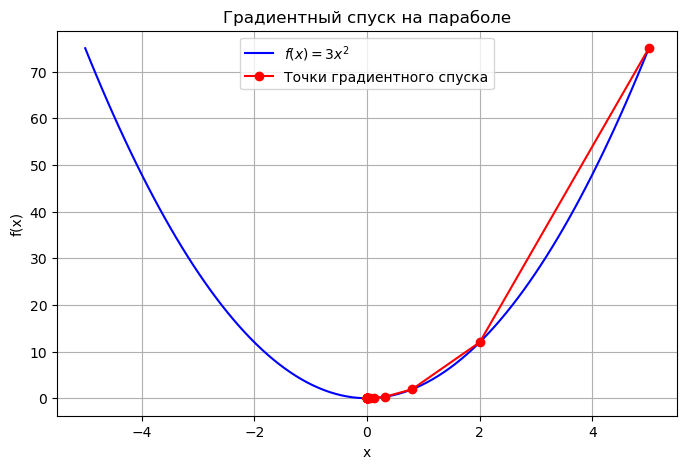

In [5]:
#массив значений х  для построения параболы
x_range = np.linspace(-5, 5, 100)
y_range = f(x_range)

plt.figure(figsize=(8, 5))
plt.plot(x_range, y_range, label=r'$f(x) = 3x^2$', color='blue')  #парабола
plt.plot(x_values, f_values, marker='o', color='red', label="Точки градиентного спуска")  #точки спуска
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Градиентный спуск на параболе')
plt.legend()
plt.grid()
plt.show()

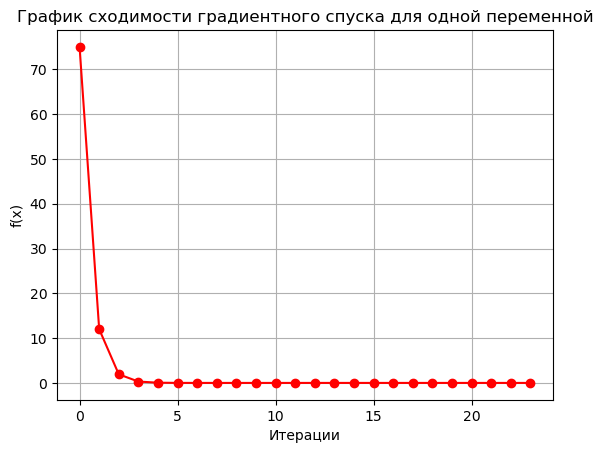

In [6]:
plt.plot(range(len(f_values)), f_values, marker='o', color='red')
plt.xlabel('Итерации')
plt.ylabel('f(x)')
plt.title('График сходимости градиентного спуска для одной переменной')
plt.grid()
plt.show()

## **Градиентный спуск для функции с двумя переменными**

In [7]:
def f(x, y):
    return 3*x**2 + 5*y**2

def df(x, y):
    return np.array([6 * x, 10 * y])

In [8]:
#начальные параметры
x0, y0 = 5, 10 #начальная точка
lambda_ = 0.1 #скорость обучения
tolerance = 1e-8 #условие остановки
iteration = 0
trajectory = []

In [9]:
print(f"{'Итерация':^10} {'x':^10} {'y':^10} {'f(x, y)':^15}")

while True:
    f_value = f(x0, y0)
    trajectory.append((x0, y0, f(x0, y0)))
    grad = df(x0, y0) 

    print(f"{iteration:^10} {x0:^10.5f} {y0:^10.5f} {f_value:^15.5f}")

    x1, y1 = np.array([x0, y0]) - lambda_ * grad

    if np.linalg.norm([x1 - x0, y1 - y0]) < tolerance: 
        break

    x0, y0 = x1, y1 
    iteration += 1

trajectory = np.array(trajectory)

 Итерация      x          y          f(x, y)    
    0       5.00000    10.00000     575.00000   
    1       2.00000    0.00000      12.00000    
    2       0.80000    0.00000       1.92000    
    3       0.32000    0.00000       0.30720    
    4       0.12800    0.00000       0.04915    
    5       0.05120    0.00000       0.00786    
    6       0.02048    0.00000       0.00126    
    7       0.00819    0.00000       0.00020    
    8       0.00328    0.00000       0.00003    
    9       0.00131    0.00000       0.00001    
    10      0.00052    0.00000       0.00000    
    11      0.00021    0.00000       0.00000    
    12      0.00008    0.00000       0.00000    
    13      0.00003    0.00000       0.00000    
    14      0.00001    0.00000       0.00000    
    15      0.00001    0.00000       0.00000    
    16      0.00000    0.00000       0.00000    
    17      0.00000    0.00000       0.00000    
    18      0.00000    0.00000       0.00000    
    19      0.00000 

Jupyter округляет числа быстрее, чем локальный Python, поэтому y обнуляется сразу. NumPy с AVX512 округляет маленькие числа быстрее, чем обычный Python, поэтому y становится 0 на первом шаге. Что-либо изменить изменить можно с помощью масштабирования переменных, однако это приведет к большому количеству итераций, что не очень удобно. На графике убедимся, что все работает как нужно и округление не мешает добиться нужных результатов

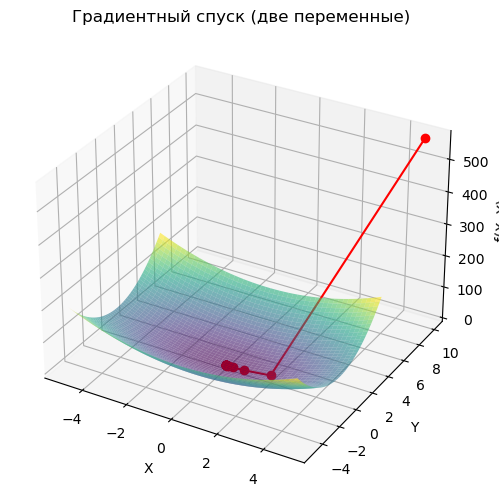

In [10]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

#поверхность функции
X = np.linspace(-5, 5, 50)
Y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

#траектория градиентного спуска
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], marker='o', color='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Градиентный спуск (две переменные)')
plt.show()

## **Градиент спуска для двух переменных с методом наискорейшего спуска**

In [11]:
from scipy.optimize import minimize_scalar  #добавляем библиотеку для поиска оптимального шага λ

#функция одномерного поиска оптимального шага λ
def optimal_lambda(xk, yk, dk):
    #функция f(xk + λ * dk[0], yk + λ * dk[1]) -> минимизируем по λ
    func = lambda lambd: f(xk + lambd * dk[0], yk + lambd * dk[1])
    
    #используем метод Золотого сечения
    res = minimize_scalar(func, method='golden', bracket=(0, 1))
    
    return res.x  

In [12]:
#начальные параметры
x0, y0 = 5, 10
tolerance = 1e-8
iteration = 0
trajectory = [(x0, y0, f(x0, y0))] 

In [13]:
print(f"{'Итерация':^10} {'x':^15} {'y':^15} {'f(x, y)':^20} {'λ':^15}")

while True:
    f_value = f(x0, y0)
    trajectory.append((x0, y0, f(x0, y0)))
    grad = df(x0, y0)  
    dk = -grad  #направление спуска

    #оптимизируем шаг λ
    lambda_opt = optimal_lambda(x0, y0, dk)

    print(f"{iteration:^10} {x0:^15.5f} {y0:^15.5f} {f_value:^20.5f} {lambda_opt:^15.5f}")

    x1, y1 = np.array([x0, y0]) + lambda_opt * dk 

    if np.linalg.norm([x1 - x0, y1 - y0]) < tolerance:
        break

    x0, y0 = x1, y1 
    iteration += 1

trajectory = np.array(trajectory)

 Итерация         x               y              f(x, y)               λ       
    0          5.00000        10.00000          575.00000           0.10342    
    1          1.89753        -0.34156           11.38520           0.15797    
    2          0.09900         0.19800           0.22543            0.10342    
    3          0.03757        -0.00676           0.00446            0.15797    
    4          0.00196         0.00392           0.00009            0.10342    
    5          0.00074        -0.00013           0.00000            0.15797    
    6          0.00004         0.00008           0.00000            0.10342    
    7          0.00001        -0.00000           0.00000            0.15797    
    8          0.00000         0.00000           0.00000            0.10342    
    9          0.00000        -0.00000           0.00000            0.15797    
    10         0.00000         0.00000           0.00000            0.10342    
    11         0.00000        -0.00000  

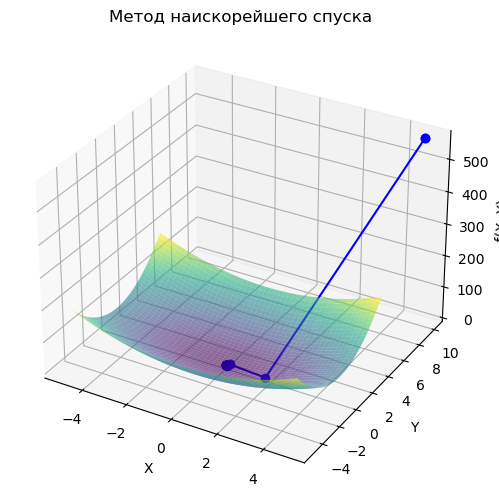

In [17]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

#поверхность функции
X = np.linspace(-5, 5, 50)
Y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

#траектория градиентного спуска
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], linestyle='-', marker='o', color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Метод наискорейшего спуска')
plt.show()